## Importing Libraries

In [1]:
import math
import scipy
import numpy as np
from math import sin
import seaborn as sns
from scipy.ndimage import rotate
import matplotlib.pyplot as plt

from helpers import *

## Filtering

In [2]:
x = [3 + sin(2*np.pi*i/15) for i in range(16)]
print(x)

[3.0, 3.4067366430758, 3.743144825477394, 3.9510565162951536, 3.9945218953682735, 3.866025403784439, 3.5877852522924734, 3.207911690817759, 2.792088309182241, 2.412214747707527, 2.1339745962155616, 2.0054781046317265, 2.0489434837048464, 2.256855174522606, 2.5932633569242, 2.9999999999999987]


In [3]:
def plot2(y1, y2):
    fig = plt.figure(figsize = (10, 5))
    fig.add_subplot(1, 2, 1)
    plt.title('(i) Classical Implementation')
    plt.plot(list(range(len(y1))), y1, color ='tab:blue') 

    fig.add_subplot(1, 2, 2)
    plt.title('(ii) Convolutional Implementation')
    plt.plot(list(range(len(y2))), y2, color ='tab:orange')
    plt.show()

In [4]:
def plot3(y1, y2, y3):
    fig = plt.figure(figsize = (15, 5))
    fig.add_subplot(1, 3, 1)
    plt.title('(i) Classical Implementation')
    plt.plot(list(range(len(y1))), y1, color ='tab:blue') 

    fig.add_subplot(1, 3, 2)
    plt.title('(ii) Convolutional Implementation')
    plt.plot(list(range(len(y2))), y2, color ='tab:orange')
    
    fig.add_subplot(1, 3, 3)
    plt.title('(ii) Fourier Space Implementation')
    plt.plot(list(range(len(y3))), y3, color ='tab:green')
    plt.show()

In [5]:
def convolve1D(signal, kernel):
    # get signal and kernel size
    sx = len(signal)
    kx = len(kernel)

    pad = (kx-1)//2
    
    # pad the signal to prep for convolution
    sig_pad = np.zeros(sx + kx)
    for j in np.arange(0, sx):
        sig_pad[j + pad] = signal[j]
    
    # we fill in the output list
    out = np.zeros(sx)
    for j in np.arange(pad, sx + pad):
        # select the region of interest (ROI)
        roi = sig_pad[j - pad: j + pad + 1]
        # carry out the convolution
        conv = (roi * kernel).sum()
        out[j - pad] = conv
    
    return out

### Filter 1: $y_k = x_{k+1} - x
_{k}$

In [6]:
# classical implementation
y11 = [0 for i in range(15)]
x11 = x + [0] 
for i in range(15):
    y11[i] = x11[i+1] - x11[i]
   
# convolutional implementation
k1 = [0, -1, 1]
y12 = convolve1D(x, k1)[:15]

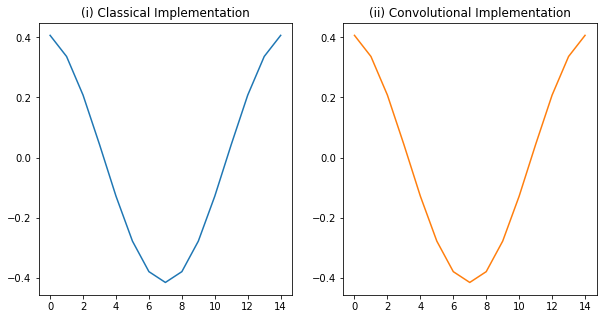

In [7]:
plot2(y11, y12)

### Filter 2: $y_k = x_k - \frac{1}{L+1}\sum_{i=0}^{L} x_i$

In [8]:
# classical implementation
y21 = [0 for i in range(15)]
xm = sum(x)/16 
for i in range(15):
    y21[i] = round(x[i] - xm, 8)
   
# convolutional implementation
k2 = [-1.0/16 for i in range(15+15+1)]
k2[15] *= -15
y22 = convolve1D(x, k2)[:15]

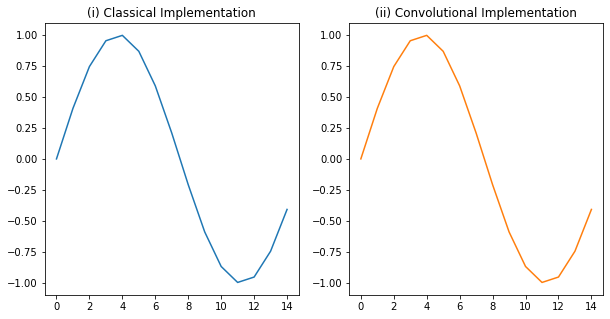

In [9]:
plot2(y21, y22)

### Filter 3: $y_k = median(\{x_i| i \in (l-2:l+2)\})$

In [10]:
# classical implementation
y31 = [0 for i in range(15)]
xx = [0,0] + x + [0,0]
for i in range(15):
    ymed = xx[i: i+5]
    ymed.sort()
    y31[i] = ymed[2]
   
# there is no convolutional implementation
# filter is not linear

print(y31)

[3.0, 3.4067366430758, 3.743144825477394, 3.866025403784439, 3.866025403784439, 3.866025403784439, 3.5877852522924734, 3.207911690817759, 2.792088309182241, 2.412214747707527, 2.1339745962155616, 2.1339745962155616, 2.1339745962155616, 2.256855174522606, 2.256855174522606]


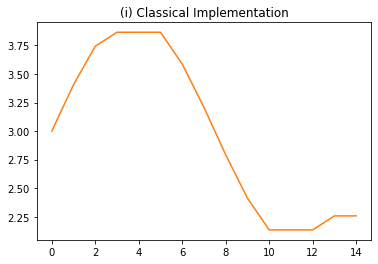

In [11]:
plt.title('(i) Classical Implementation')
plt.plot(list(range(len(y31))), y31, color ='tab:orange')
plt.show()

### Filter 4: $y_k = x_{k+0.5} - x_{k-0.5}$

In [12]:
# classical implementation
y41 = [0 for i in range(14)]
x41 = [0] + x + [0] 
for i in range(14):
    y41[i] = round((x41[i+3] - x41[i+1])/2, 8)
   
# convolutional implementation
k4 = [-0.5, 0, 0.5]
y42 = convolve1D(x, k4)[1:15]

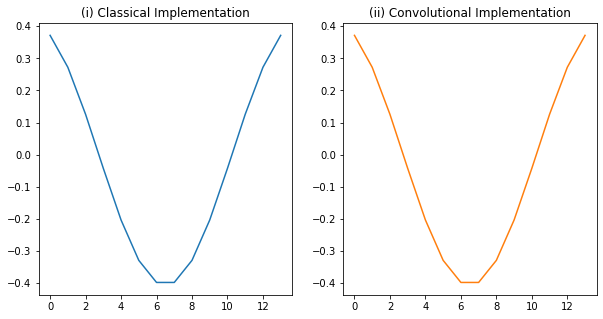

In [13]:
plot2(y41, y42)

### Filter 5: $y_k = |x_{k+0.5} - x_{k-0.5}|$

In [14]:
# classical implementation
y51 = [0 for i in range(15)]
x51 = [0] + x + [0] 
for i in range(15):
    y51[i] = round(abs(x51[i+2] - x51[i])/2, 8)
   
# convolutional implementation does not exist
# since filter is non-linear

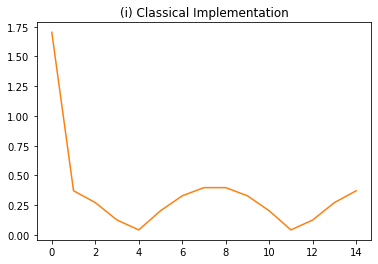

In [15]:
plt.title('(i) Classical Implementation')
plt.plot(list(range(len(y51))), y51, color ='tab:orange')
plt.show()

### Filter 6: $y_k = \frac{1}{5} \sum_{i=k-2}^{k+2} x_i$

In [16]:
# classical implementation
y61 = [0 for i in range(14)]
xx = [0,0] + x + [0,0]
for i in range(14):
    y61[i] = round(sum(xx[i: i+5])/5, 8)
    
# convolutional implementation
k6 = [0.2, 0.2, 0.2, 0.2, 0.2]
y62 = convolve1D(x, k6)[:14]

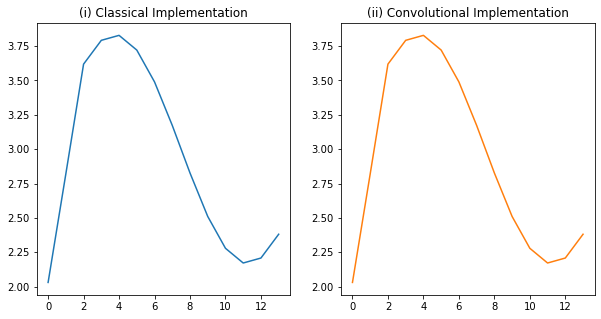

In [17]:
plot2(y61, y62)

## Filtering in Fourier Space

In [18]:
def dft(x, N):
    l = len(x)
    x = x + [0 for i in range(int((N-l)))]
    X = [complex(0, 0) for i in range(N)]
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(complex(0, -2*np.pi*k*n/N))
    
    return X

In [19]:
def idft(x, N):
    l = len(x)
    X = [complex(0, 0) for i in range(N)]
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(complex(0, 2*np.pi*k*n/N))/N
    
    return X

In [20]:
def fourier_filter(signal, kernel):
    # this length is set to ensure the convolution can be carried out by multiplication
    lenC = len(signal) + len(kernel) - 1
    
    fsig = dft(signal, lenC)
    fker = dft(kernel, lenC)
    
    fconv = np.multiply(fsig, fker)
    conv = idft(fconv, lenC)
    
    return conv[len(kernel)//2: len(signal) + len(kernel)//2]

C:\Users\Vishnu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


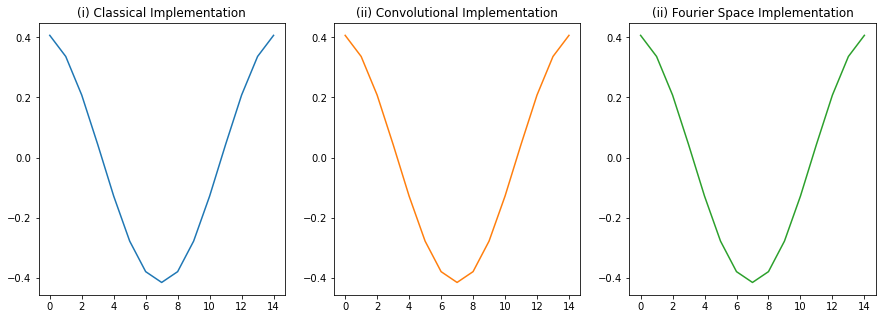

In [21]:
y13 = fourier_filter(x, [0, 1, -1])[1:]
plot3(y11, y12, y13)

C:\Users\Vishnu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


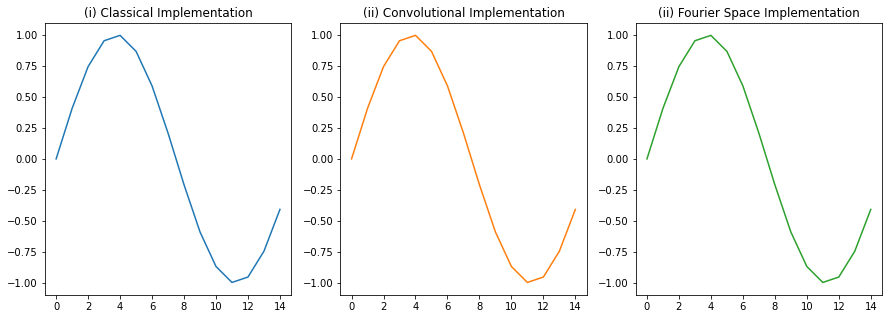

In [22]:
k2 = [-1.0/16 for i in range(15+15+1)]
k2[15] *= -15
y23 = fourier_filter(x, k2)[:15]
plot3(y21, y22, y23)

C:\Users\Vishnu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


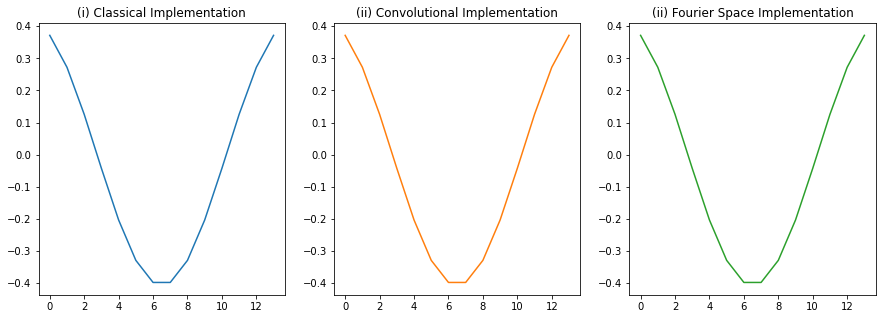

In [23]:
y43 = fourier_filter(x, [0.5, 0, -0.5])[1:15]
plot3(y41, y42, y43)

C:\Users\Vishnu\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


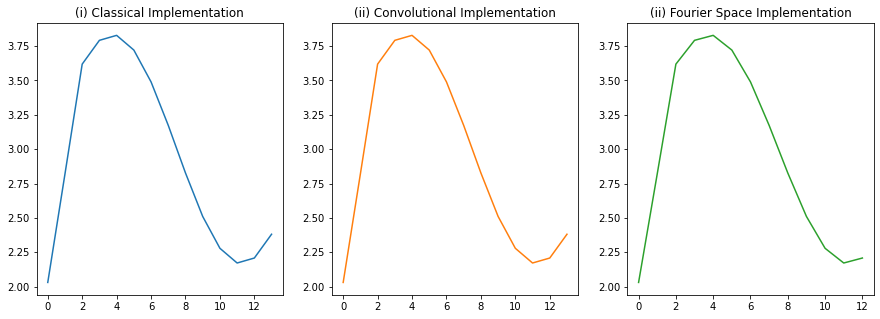

In [24]:
y63 = fourier_filter(x, [0.2, 0.2, 0.2, 0.2, 0.2])[0:13]
plot3(y61, y62, y63)

## Hybrid Images

In [25]:
def convolve2D(img, kernel):
    # get image and kernel size
    (ih, iw, ic) = img.shape
    (kh, kw) = kernel.shape
    
    if kw%2==0 or kh%2==0:
        raise Exception("Kernel Dimensions must be Odd")
    
    # note that kw and kh are both of the form '2k+1'
    padw = (kw - 1)//2
    padh = (kh - 1)//2
    
    # pad the image to prep for convolution (Zero padding)
    img_pad = np.zeros((ih + 2*padh, iw + 2*padw, ic))
    for y in np.arange(padh, ih + padh):
        for x in np.arange(padw, iw + padw):
            for z in np.arange(0, ic):
                # padded image values are filled in
                img_pad[y,x,z] = img[y-padh,x-padw,z]
            
    
    # we fill in the output matrix
    out = np.zeros((ih, iw, ic))
    for y in np.arange(padh, ih + padh):
        for x in np.arange(padw, iw + padw ):
            for z in np.arange(0, ic):
                # select the region of interest (ROI)
                roi = img_pad[y - padh: y + padh + 1, x - padw: x + padw + 1, z]
                # carry out the convolution
                conv = (roi * kernel).sum()
                out[y - padh, x - padw, z] = conv 
    
    return out

In [26]:
# code to define a gaussian kernel 
def gaussian_kernel(sigma):
    size = int(2*np.ceil(3*sigma) + 1)
    g = np.ones((size, size))
    k = size//2
    norm = 1/(2 * np.pi * (sigma**2))
    
    
    for i in np.arange(0, size):
        for j in np.arange(0, size):
            g[i, j] = np.exp(-1*((i - k)**2 + (j - k)**2)/(2*(sigma**2)))
            g[i, j] = norm * g[i, j] 
    
    return g

In [27]:
# low pass filter
def low_pass(img, cutoff):
    (ih, iw, ic) = img.shape
    
    # use gaussian kernel to get the low-pass filtered image
    gauss = gaussian_kernel(cutoff)
    low_freq = convolve2D(img, gauss)
    
    # clip the image pixel values at 0 and 1
    out = np.zeros((ih,iw, ic))
    for i in range(ih):
        for j in range(iw):
            for k in range(ic):
                if low_freq[i,j,k] < 0: out[i,j,k] = 0
                elif low_freq[i,j,k] > 1: out[i,j,k] = 1
                else: out[i,j,k] = low_freq[i,j,k]
            
    return out

In [28]:
# high pass filter
def high_pass(img, cutoff):
    (ih, iw, ic) = img.shape
    
    # use gaussian filter to get high-pass filtered image
    gauss = gaussian_kernel(cutoff)
    low_freq = convolve2D(img, gauss)
    high_freq = img - low_freq
    
    #clip the image pixel values at 0 and 1 after adding 0.5
    out = np.zeros((ih,iw, ic))
    for i in range(ih):
        for j in range(iw):
            for k in range(ic):
                high_freq[i,j,k] += 0.5

                if high_freq[i,j,k] < 0: out[i,j,k] = 0
                elif high_freq[i,j,k] > 1: out[i,j,k] = 1
                else: out[i,j,k] = high_freq[i,j,k]
            
    return out

In [29]:
# hybrid images
def merge(impath1, impath2, sigma):
    
    # load images
    im1 = load_image(impath1)
    im2 = load_image(impath2)
    
    # if the image is grayscale we reshape it to add nc = 1 to the shape of the np array
    if(len(im1.shape) == 2):
        (h, w) = im1.shape
        im1 = im1.reshape((h, w, 1))
        im2 = im2.reshape((h, w, 1))
    
    # we rotate the image to align the longer edges together
    if(im1.shape[0]>im1.shape[1] and im2.shape[0]<im2.shape[1]):
        im1 = rotate(im1, 270)
    if(im1.shape[0]<im1.shape[1] and im2.shape[0]>im2.shape[1]):
        im2 = rotate(im2, 270)
    
    # now we rescale the second image to match the width (chosen arbitrarily) with the first image
    im2 = rescale(im2, (im1.shape[1]/im2.shape[1]), mode='reflect', multichannel=True)
    
    #calculate the LPF and HPF of the first and second images respectively
    lp1 = low_pass(im1, sigma)
    hp2 = high_pass(im2, sigma)
    
    # the smaller dimensions are taken to prevent Index out of bounds error
    (ih1, iw1, ic) = im1.shape
    (ih2, iw2, ic) = im2.shape
    ih, iw = min(ih1, ih2), min(iw1, iw2)
    
    # output image is set as average of the LPF anf HPF filtered image
    out = np.zeros((ih, iw, ic))
    for i in range(ih):
        for j in range(iw):
            for k in range(ic):
                out[i,j,k] = (lp1[i,j,k] + hp2[i,j,k])/2
                
                if out[i,j,k] < 0: out[i,j,k] = 0
                elif out[i,j,k] > 1: out[i,j,k] = 1
    
    # we visualise the hybrid image
    hyb = vis_hybrid_image(out)
    return hyb

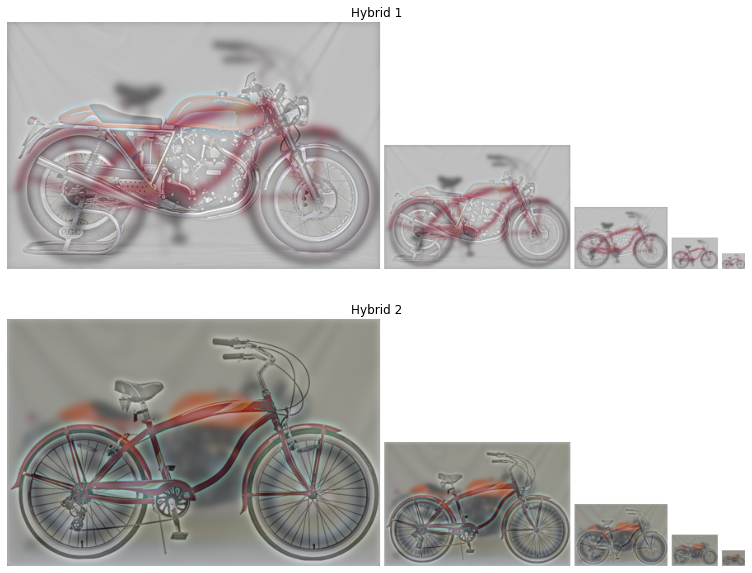

In [30]:
hyb11 = merge('./data/ex01/bicycle.bmp', './data/ex01/motorcycle.bmp', 4.5)
hyb12 = merge('./data/ex01/motorcycle.bmp', './data/ex01/bicycle.bmp', 4.5)

fig = plt.figure(figsize = (15, 10))
fig.add_subplot(2, 1, 1)
plt.axis('off')
plt.title('Hybrid 1')
plt.imshow(hyb11)

fig.add_subplot(2, 1, 2)
plt.axis('off')
plt.title('Hybrid 2')
plt.imshow(hyb12)
plt.show()

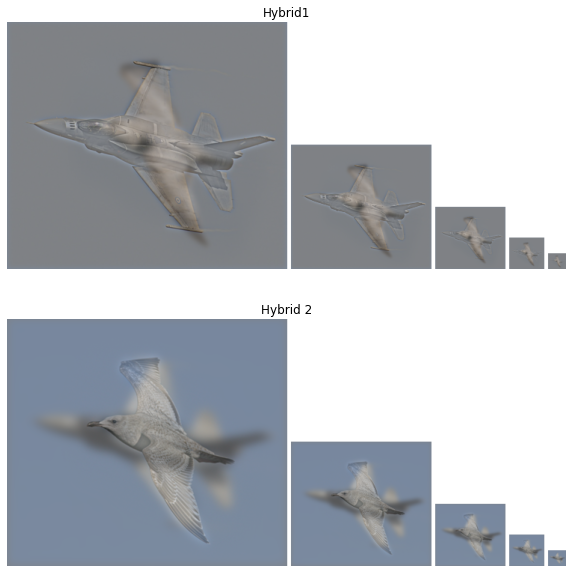

In [31]:
hyb21 = merge('./data/ex02/bird.bmp', './data/ex02/plane.bmp', 3.5)
hyb22 = merge('./data/ex02/plane.bmp', './data/ex02/bird.bmp', 6)

fig = plt.figure(figsize = (15, 10))
fig.add_subplot(2, 1, 1)
plt.axis('off')
plt.title('Hybrid1')
plt.imshow(hyb21)

fig.add_subplot(2, 1, 2)
plt.axis('off')
plt.title('Hybrid 2')
plt.imshow(hyb22)
plt.show()

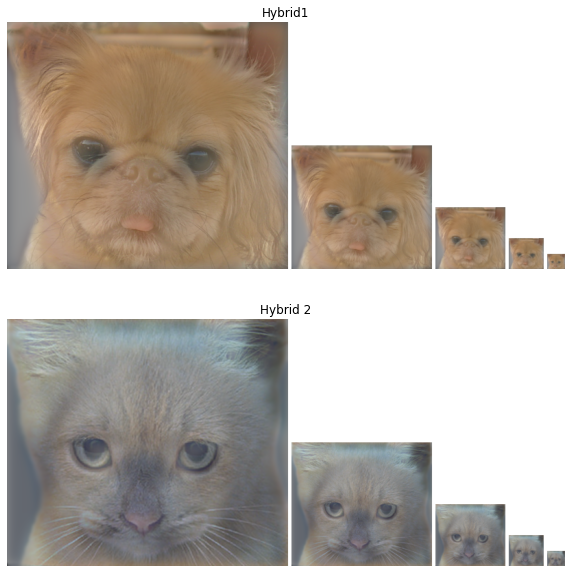

In [32]:
hyb31 = merge('./data/ex03/cat.bmp', './data/ex03/dog.bmp', 10)
hyb32 = merge('./data/ex03/dog.bmp', './data/ex03/cat.bmp', 8)

fig = plt.figure(figsize = (15, 10))
fig.add_subplot(2, 1, 1)
plt.axis('off')
plt.title('Hybrid1')
plt.imshow(hyb31)

fig.add_subplot(2, 1, 2)
plt.axis('off')
plt.title('Hybrid 2')
plt.imshow(hyb32)
plt.show()

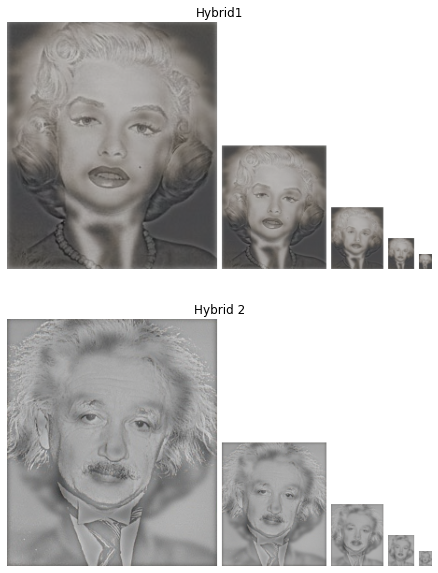

In [33]:
hyb41 = merge('./data/ex04/einstein.bmp', './data/ex04/marilyn.bmp', 3)
hyb42 = merge('./data/ex04/marilyn.bmp', './data/ex04/einstein.bmp', 3)

fig = plt.figure(figsize = (15, 10))
fig.add_subplot(2, 1, 1)
plt.axis('off')
plt.title('Hybrid1')
plt.imshow(hyb41)

fig.add_subplot(2, 1, 2)
plt.axis('off')
plt.title('Hybrid 2')
plt.imshow(hyb42)
plt.show()

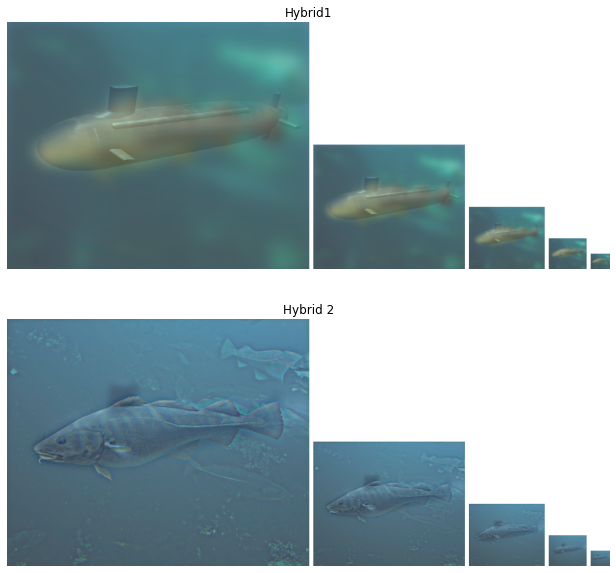

In [34]:
hyb51 = merge('./data/ex05/fish.bmp', './data/ex05/submarine.bmp', 8)
hyb52 = merge('./data/ex05/submarine.bmp', './data/ex05/fish.bmp', 4)

fig = plt.figure(figsize = (15, 10))
fig.add_subplot(2, 1, 1)
plt.axis('off')
plt.title('Hybrid1')
plt.imshow(hyb51)

fig.add_subplot(2, 1, 2)
plt.axis('off')
plt.title('Hybrid 2')
plt.imshow(hyb52)
plt.show()

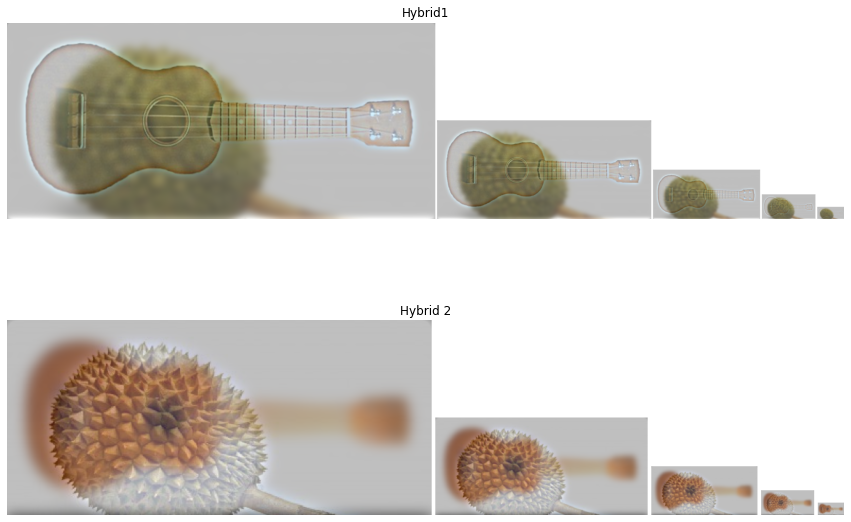

In [35]:
hyb61 = merge('./data/ex06/durian.jpg', './data/ex06/ukulele.jpg', 11)
hyb62 = merge('./data/ex06/ukulele.jpg', './data/ex06/durian.jpg', 9)

fig = plt.figure(figsize = (15, 10))
fig.add_subplot(2, 1, 1)
plt.axis('off')
plt.title('Hybrid1')
plt.imshow(hyb61)

fig.add_subplot(2, 1, 2)
plt.axis('off')
plt.title('Hybrid 2')
plt.imshow(hyb62)
plt.show()

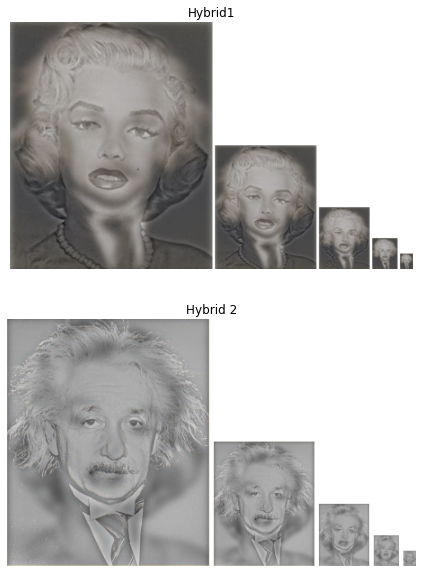

In [36]:
hyb71 = merge('./data/ex07/einstein.jpg', './data/ex07/marilyn.jpg', 6.5)
hyb72 = merge('./data/ex07/marilyn.jpg', './data/ex07/einstein.jpg', 4)

fig = plt.figure(figsize = (15, 10))
fig.add_subplot(2, 1, 1)
plt.axis('off')
plt.title('Hybrid1')
plt.imshow(hyb71)

fig.add_subplot(2, 1, 2)
plt.axis('off')
plt.title('Hybrid 2')
plt.imshow(hyb72)
plt.show()